In [2]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)
plt.rcParams["mathtext.fontset"] = "stix"

In [3]:
data = pd.concat([pd.read_csv(data, names=[
    "Number of Threads", "Number of $id$", "Prove Time"
]) for data in glob('circuit-*.txt')], ignore_index=True)
data["style"] = True
data

,Number of Threads,Number of $id$,Prove Time,style
0,32,1024,1.739106,True
1,32,1024,1.814676,True
2,32,1024,1.830842,True
3,32,1024,1.766330,True
4,32,1024,1.797060,True
...,...,...,...,...
603,64,512,1.584515,True
604,64,512,1.520048,True
605,64,512,1.516423,True
606,64,512,1.538993,True


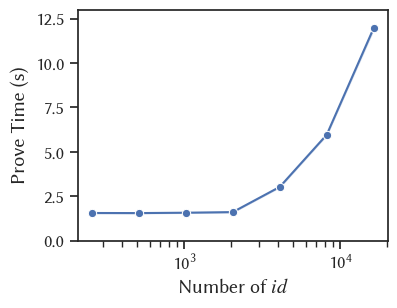

In [9]:
plt.figure(figsize=(4, 3))
f = sns.lineplot(data=data[(data["Number of Threads"] == 64) & (data["Number of $id$"] >= 256)], 
    x="Number of $id$", y="Prove Time", style="style", markers=["o"], legend=False)
f.set(ylim=(0, 13.), xscale="log")
f.set(ylabel="Prove Time (s)")
f.figure.savefig("id-prove.pdf", bbox_inches='tight')

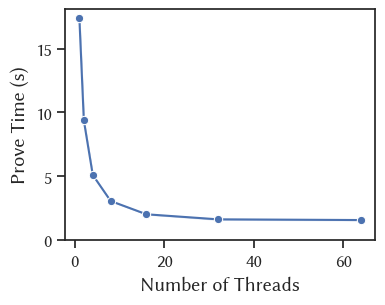

In [10]:
plt.figure(figsize=(4, 3))
f = sns.lineplot(data=data[data["Number of $id$"] == 1024], 
    x="Number of Threads", y="Prove Time", style="style", markers=["o"], legend=False)
f.set(ylim=(0, 18.1))
f.set(ylabel="Prove Time (s)")
f.figure.savefig("thread-prove.pdf", bbox_inches='tight')
